**Concrete Strength Dataset Description**

| **Name**                          | **Data Type** | **Measurement**         | **Description**                               |
|-----------------------------------|---------------|-------------------------|-----------------------------------------------|
| **Cement (component 1)**          | Quantitative  | kg in a m³ mixture      | Represents the amount of cement used in the concrete mixture. |
| **Blast Furnace Slag (component 2)** | Quantitative  | kg in a m³ mixture      | The quantity of blast furnace slag used in the mixture. |
| **Fly Ash (component 3)**         | Quantitative  | kg in a m³ mixture      | The amount of fly ash present in the concrete. |
| **Water (component 4)**           | Quantitative  | kg in a m³ mixture      | Quantity of water used in the mixture.         |
| **Superplasticizer (component 5)** | Quantitative  | kg in a m³ mixture      | Amount of superplasticizer added to enhance workability. |
| **Coarse Aggregate (component 6)** | Quantitative  | kg in a m³ mixture      | The weight of coarse aggregate in the mixture. |
| **Fine Aggregate (component 7)**  | Quantitative  | kg in a m³ mixture      | The weight of fine aggregate in the mixture.   |
| **Age**                           | Quantitative  | Days (1–365)            | Age of the concrete sample in days.           |
| **Concrete compressive strength** | Quantitative  | MPa                     | Compressive strength of the concrete, measured in megapascals (MPa). (Output variable) |

This dataset contains numerical features that represent the composition and properties of concrete, as well as the target variable, which is the compressive strength of the concrete.

In [1]:
!pip install pygam
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib
import time

# Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import defaultdict


# Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from pygam import GAM, LinearGAM
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import QuantileRegressor


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [2]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1__EAn1DRrvTD6y7ngbgLS8hB12l85OtI/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Concrete Strength Dataset.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Concrete Strength Dataset.csv')
data.head(20)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


(None,
             cement  blast_furnace_slag      fly_ash        water  \
 count  1030.000000         1030.000000  1030.000000  1030.000000   
 mean    281.167864           73.895825    54.188350   181.567282   
 std     104.506364           86.279342    63.997004    21.354219   
 min     102.000000            0.000000     0.000000   121.800000   
 25%     192.375000            0.000000     0.000000   164.900000   
 50%     272.900000           22.000000     0.000000   185.000000   
 75%     350.000000          142.950000   118.300000   192.000000   
 max     540.000000          359.400000   200.100000   247.000000   
 
        superplasticizer  coarse_aggregate  fine_aggregate           age  \
 count       1030.000000       1030.000000      1030.000000  1030.000000   
 mean           6.204660        972.918932       773.580485    45.662136   
 std            5.973841         77.753954        80.175980    63.169912   
 min            0.000000        801.000000       594.000000     1.

In [4]:
missing_values = data.isnull().sum()
missing_values

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


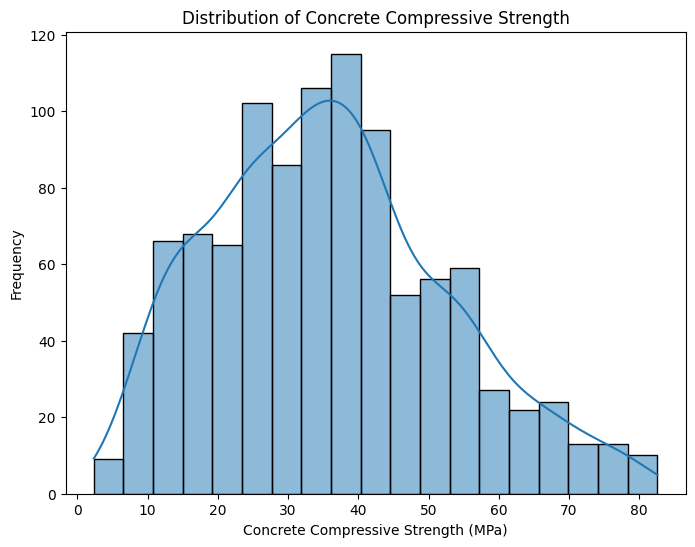

In [5]:

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['concrete_compressive_strength'], kde=True)
plt.title('Distribution of Concrete Compressive Strength')
plt.xlabel('Concrete Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

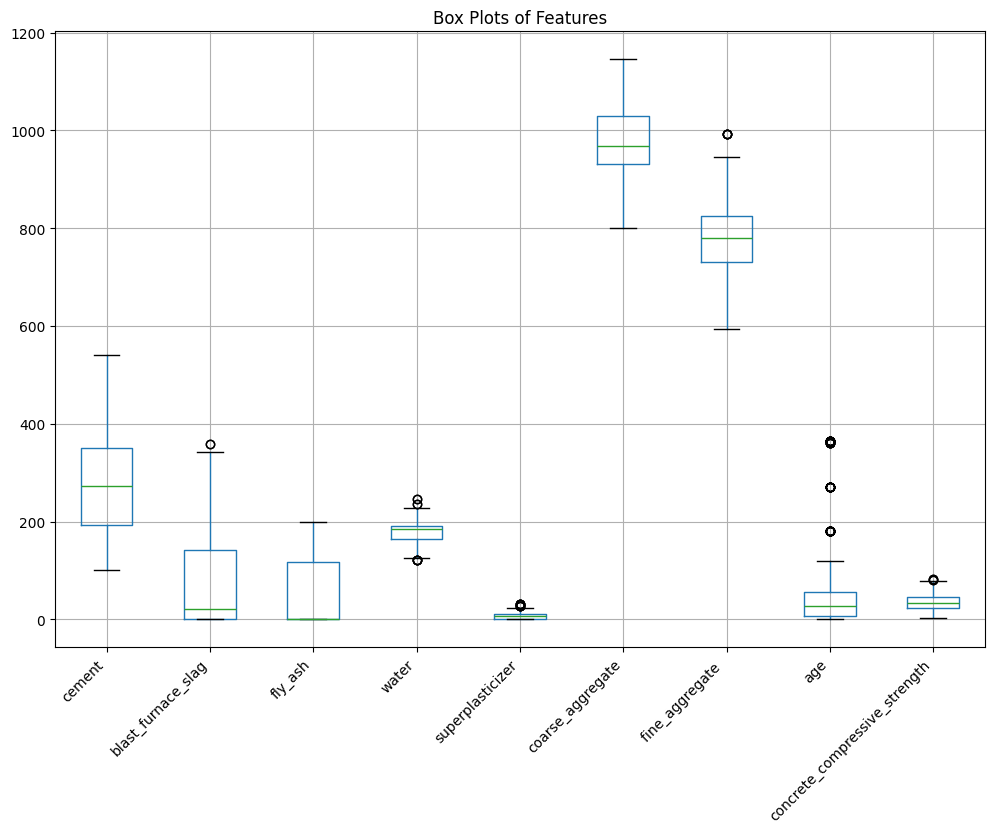

In [6]:

# Box plots for each feature
plt.figure(figsize=(12, 8))
data.boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Box Plots of Features')
plt.show()



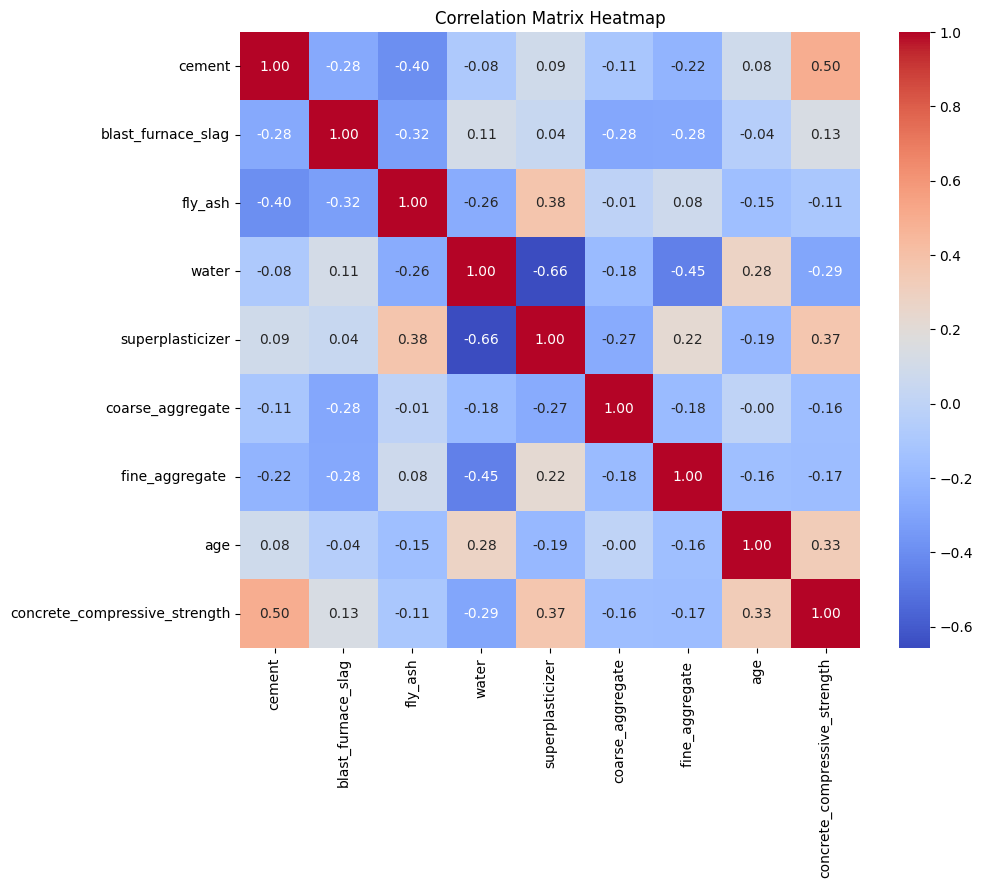

In [7]:

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


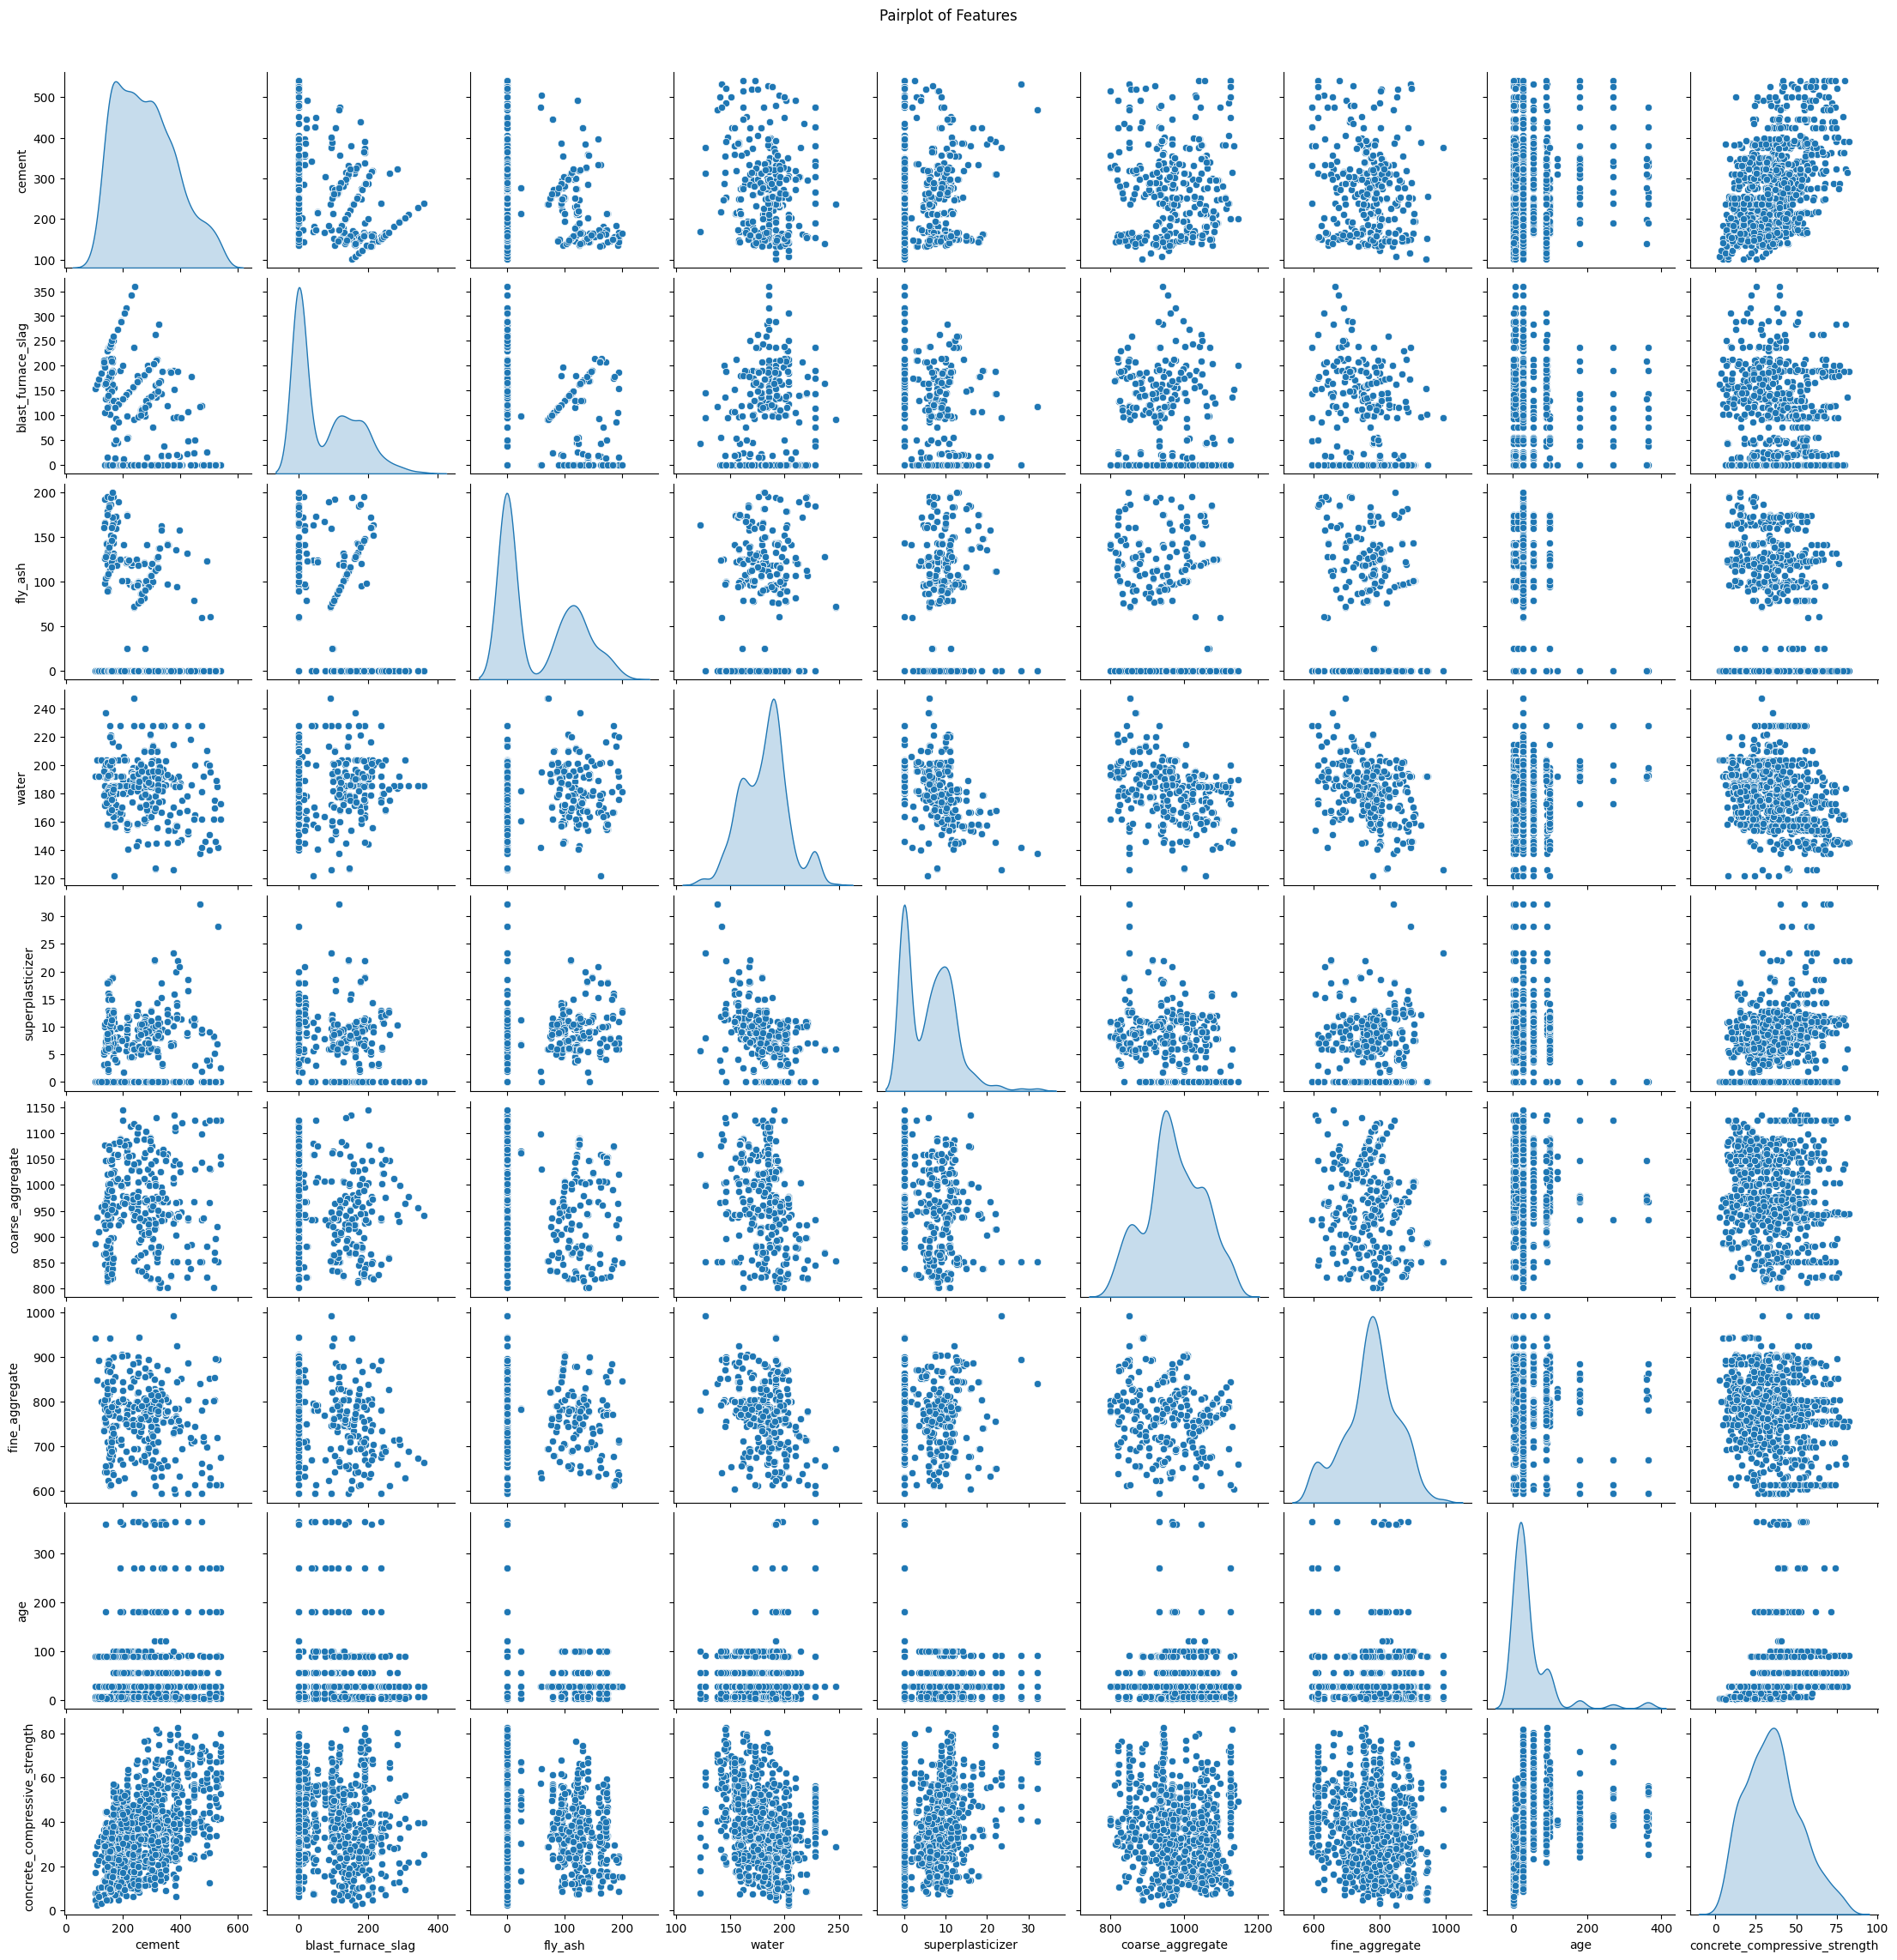

In [8]:
# Pairplot to visualize relationships between features
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


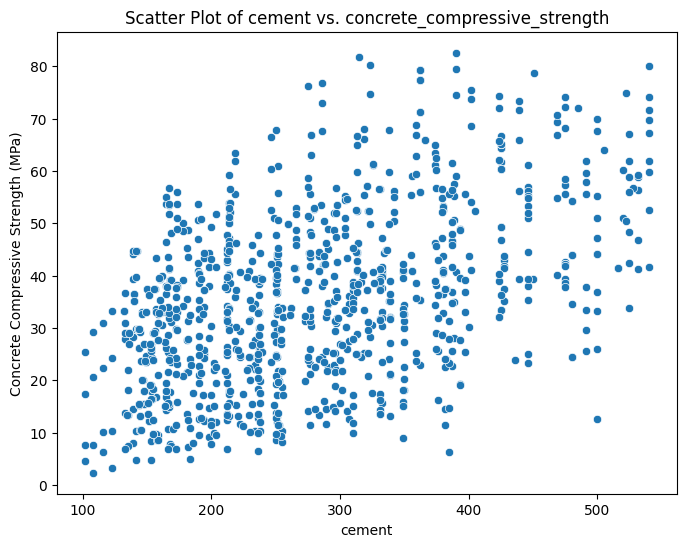

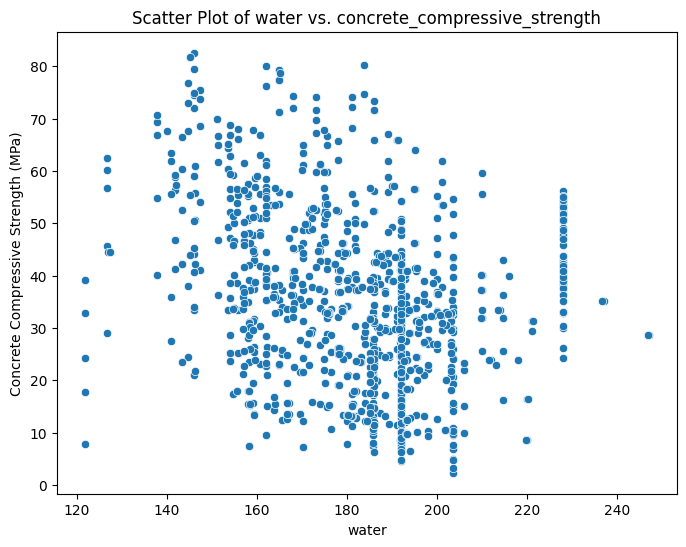

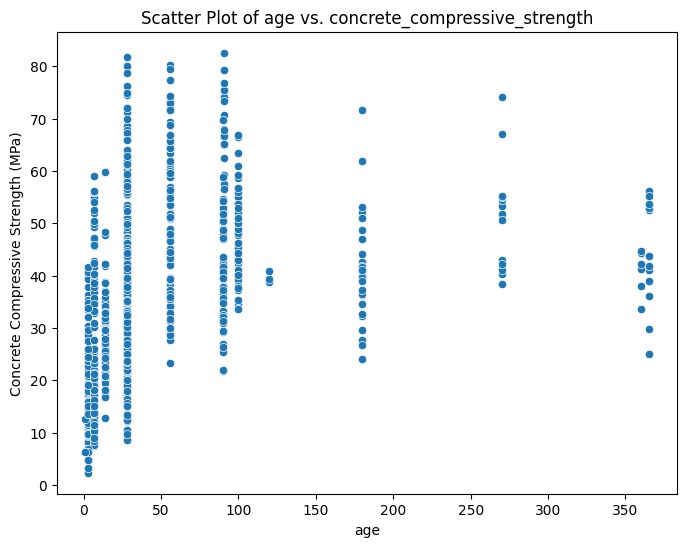

In [9]:
# Scatter plots of key features against compressive strength
features = ['cement', 'water', 'age'] # Corrected feature list
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='concrete_compressive_strength', data=data)
    plt.title(f'Scatter Plot of {feature} vs. concrete_compressive_strength')
    plt.xlabel(feature)
    plt.ylabel('Concrete Compressive Strength (MPa)')
    plt.show()

In [20]:

# Separate features (X) and target (y)
X = data.drop('concrete_compressive_strength', axis=1)
y = data['concrete_compressive_strength']
print(X.head())
print(y.head())

   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  
0            1040.0            676.0   28  
1            1055.0            676.0   28  
2             932.0            594.0  270  
3             932.0            594.0  365  
4             978.4            825.5  360  
0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: concrete_compressive_strength, dtype: float64


In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
regression_algorithms = {
    "Multiple_Linear_Regression": {
        "model": LinearRegression(fit_intercept=True, n_jobs=None)
    },

    "Polynomial_Regression": {
        "model":  LinearRegression(fit_intercept=True, n_jobs=None),
        "poly": PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
    },

    "Ridge_Regression": {
        "model": Ridge(alpha=1.0, fit_intercept=True, max_iter=None,
                      tol=1e-3, solver='auto')
    },

    "Lasso_Regression": {
        "model": Lasso(alpha=0.01, fit_intercept=True, max_iter=1000,
                      tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Elastic_Net_Regression": {
        "model": ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=True,
                           max_iter=1000, tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Decision_Tree_Regression": {
        "model": DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=1,
                                     max_features=None, random_state=42)
    },

    "Random_Forest_Regression": {
        "model": RandomForestRegressor(n_estimators=200, criterion="squared_error", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=2, bootstrap=True,
                                     n_jobs=-1, random_state=42)
    },

    "ADA_Boost_Regression": {
        "model": AdaBoostRegressor(n_estimators=50, learning_rate=0.1,
                                 loss="linear", random_state=42)
    },

    "Gradient_Boosting_Regression": {
        "model": GradientBoostingRegressor(loss="squared_error", learning_rate=0.1, n_estimators=100,
                                         subsample=0.8, criterion="friedman_mse",
                                         min_samples_split=2, min_samples_leaf=1,
                                         max_depth=5, random_state=42)
    },

    "XGBoost_Regression": {
        "model": xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100,
                                 objective="reg:squarederror", booster="gbtree", gamma=0,
                                 min_child_weight=1, subsample=1, colsample_bytree=1,
                                 reg_alpha=0, reg_lambda=1)
    },

    "K_Nearest_Neighbors_Regression": {
        "model": KNeighborsRegressor(n_neighbors=5, weights="uniform", algorithm="auto",
                                   leaf_size=30, p=2, metric="minkowski", n_jobs=-1)
    },

    "Support_Vector_Regression": {
        "model": SVR(kernel="rbf", degree=3, C=1.0, epsilon=0.1, gamma="scale",
                    tol=1e-3, max_iter=-1)
    },

    "Bayesian_Ridge_Regression": {
        "model": BayesianRidge(max_iter=300, tol=1e-3, alpha_1=1e-6, alpha_2=1e-6,
                              lambda_1=1e-6, lambda_2=1e-6, fit_intercept=True)
    },

    "Neural_Network_Regression": {
        "model": MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="adam",
                            alpha=0.0001, batch_size="auto", learning_rate="constant",
                            learning_rate_init=0.001, max_iter=500, random_state=42)
    },

    "Generalized_Additive_Models": {
        "model": LinearGAM(n_splines=10, lam=0.6, max_iter=100, tol=1e-4)
    },

    "Quantile_Regression": {
        "model": QuantileRegressor(quantile=0.5, alpha=0.0, solver="highs-ds",
                                 fit_intercept=True)
    }
}

In [14]:

models_dir = "trained_models"
os.makedirs(models_dir, exist_ok=True)

results = defaultdict(dict)

for name, config in regression_algorithms.items():
    start_time = time.time()
    model = config["model"]

    if name == "Polynomial_Regression":
        poly = config["poly"]
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    results[name]["mse"] = mse
    results[name]["r2"] = r2
    results[name]["mae"] = mae
    results[name]["time"] = time.time() - start_time

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)

    print(f"Trained and saved {name} model. MSE: {mse}, R2: {r2}, MAE: {mae}, Time: {results[name]['time']:.2f} seconds")

# Save the results to a CSV file
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv("regression_results.csv")
print("Results saved to regression_results.csv")

Trained and saved Multiple_Linear_Regression model. MSE: 95.97094009110677, R2: 0.6275531792314851, MAE: 7.745559243921434, Time: 0.00 seconds
Trained and saved Polynomial_Regression model. MSE: 55.58245788052794, R2: 0.7842939778598581, MAE: 5.96958586017134, Time: 0.01 seconds
Trained and saved Ridge_Regression model. MSE: 95.96351301487107, R2: 0.6275820024453556, MAE: 7.751886759163161, Time: 0.01 seconds
Trained and saved Lasso_Regression model. MSE: 95.96947605224044, R2: 0.6275588609161777, MAE: 7.752437203656954, Time: 0.01 seconds
Trained and saved Elastic_Net_Regression model. MSE: 96.02790963061294, R2: 0.6273320901825545, MAE: 7.7742313354521055, Time: 0.01 seconds
Trained and saved Decision_Tree_Regression model. MSE: 42.02276953883494, R2: 0.8369168114872161, MAE: 4.280072815533981, Time: 0.03 seconds
Trained and saved Random_Forest_Regression model. MSE: 31.958984380963734, R2: 0.8759726421729241, MAE: 4.016142830003399, Time: 0.85 seconds
Trained and saved ADA_Boost_Reg

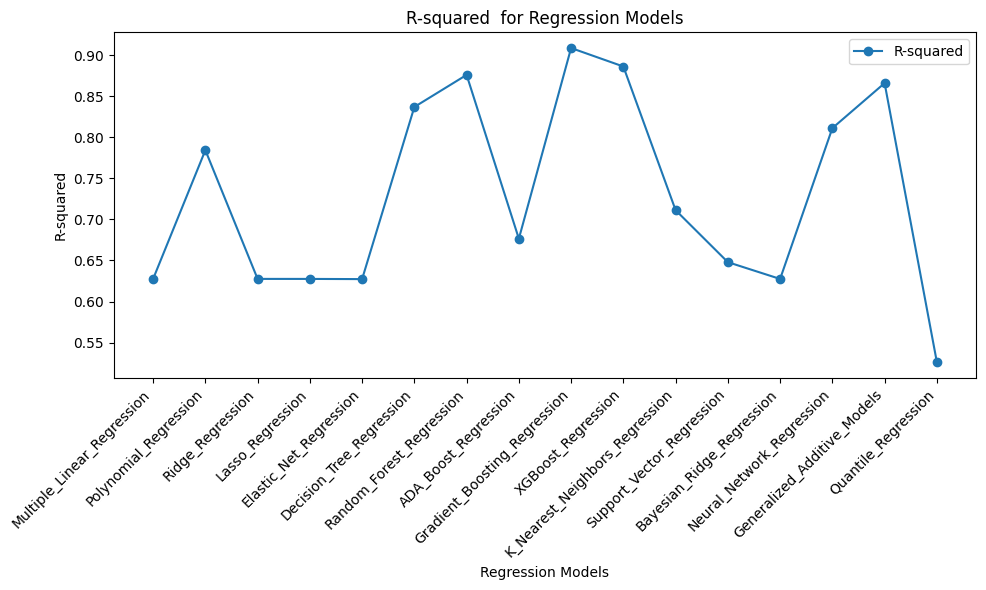

In [15]:

plt.figure(figsize=(10, 6))

# Plot R-squared values
plt.plot(results_df.index, results_df['r2'], marker='o', linestyle='-', label='R-squared')


plt.xlabel("Regression Models")
plt.ylabel("R-squared")
plt.title("R-squared  for Regression Models")
plt.xticks(rotation=45, ha="right")
plt.legend()


plt.tight_layout()
plt.show()

In [24]:

# Load the scaler
scaler = joblib.load('scaler.pkl')

new_data = np.array([[540, 0, 0, 162, 2.5, 1040, 676, 28]])

# Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)
# Load all saved models and make predictions
models_dir = "trained_models"
predictions = {}

for filename in os.listdir(models_dir):
    if filename.endswith(".joblib"):
        model_name = filename[:-7]  # Remove the .joblib extension
        model = joblib.load(os.path.join(models_dir, filename))

        if model_name == "Polynomial_Regression":
            poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
            new_data_poly = poly.fit_transform(new_data_scaled)
            predictions[model_name] = model.predict(new_data_poly)[0]
        else:
            predictions[model_name] = model.predict(new_data_scaled)[0]

# Print the predictions
for model_name, prediction in predictions.items():
    print(f"Prediction from {model_name}: {prediction}")

Prediction from Generalized_Additive_Models: 66.81287105573162
Prediction from Gradient_Boosting_Regression: 77.05813928617361
Prediction from Ridge_Regression: 52.47980222676692
Prediction from Elastic_Net_Regression: 52.64318878637705
Prediction from Decision_Tree_Regression: 79.99
Prediction from Support_Vector_Regression: 48.30073452989824
Prediction from Neural_Network_Regression: 61.150063159653435
Prediction from Bayesian_Ridge_Regression: 52.557468085140144
Prediction from ADA_Boost_Regression: 61.17715189873417
Prediction from Multiple_Linear_Regression: 52.428410164277054
Prediction from K_Nearest_Neighbors_Regression: 67.51
Prediction from Polynomial_Regression: 58.86101220177146
Prediction from Lasso_Regression: 52.52731277984667
Prediction from Random_Forest_Regression: 69.35441656746029
Prediction from XGBoost_Regression: 69.39189147949219
Prediction from Quantile_Regression: 53.385894599142915
